# 시가총액 데이터셋(marcap) 튜토리얼 - 섹터분석

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

In [ ]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

In [1]:
from marcap import marcap_data

df_marcap = marcap_data('1995-05-02', '2022-02-03')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,308700,테크엔,KONEX,일반기업부,714,5,-126,-15.00,714,753,714,31,22173,2856000000,4000000,KNX,2605
2022-01-28,267060,명진홀딩스,KONEX,일반기업부,281,2,-22,-7.26,339,339,271,687,192493,2568846924,9141804,KNX,2606
2022-01-28,267810,앙츠,KONEX,일반기업부,1340,3,0,0.00,1345,1345,1340,116,155940,2394580000,1787000,KNX,2607


In [2]:
len(df_marcap)

11733281

## 환경 설정 - matplotlib 한글 (구글 Colab)

구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.

matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

한글 폰트 설치

아래 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
다시 한번 아래 셀을 실행합니다.

'한글 테스트' 가 표시되면 성공한 것입니다.

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


Text(0.5, 1.0, '한글 테스트')

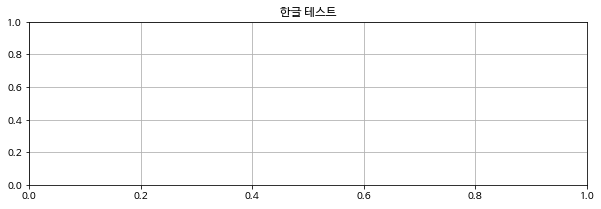

In [3]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*

# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 테스트')

## 환경 설정 - 판다스 출력 자리수

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [4]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format

## 섹터 분석

[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)를 사용하면 전체종목 코드와 섹터 데이터를 손쉽게 가져올 수 있습니다.


[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)는 다음과 같이 설치합니다.

In [6]:
!pip install -q finance-datareader

You should consider upgrading via the 'c:\users\wkdwoo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


다음과 같이 간편하게 전체종목 코드와 섹터 데이터를 가져올 수 있습니다.
전체종목 목록을 "종목마스터"(df_master)라고 부르겠습니다.

In [7]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [8]:
len(df_master)

7513

ETF 혹은 우선주에는 Sector 값이 지정되어 있지 않습니다. 따라서 Sector 가 지정된(즉, NaN이 아닌) 종목만 추출합니다.

In [9]:
df_master = df_master.dropna(subset=['Sector'])
df_master

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7506,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7507,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7510,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7511,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


## 전체종목과 시가총액 데이터 병합
다음 두 데이터를 종목코드를 기준으로 병합합니다.

* 종목마스터(df_master): 종목코드(Symbol), 섹터(Sector)
* 시가총액 데이터(df_marcap): 종목코드(Code), 종목명(Name), 시가총액(Marcap)


시가총액 데이터(df_marcap)에서 종목코드(Code), 종목명(Name), 시가총액(Marcap) 데이터만 사용하고, 
이후 날짜를 사용하기 위해 인덱스를 풀어(reset_index)줍니다. 

In [10]:
df_marcap[['Code', 'Name', 'Marcap']].reset_index()

,Date,Code,Name,Marcap
0,1995-05-02,015760,한국전력공사,16872679291000
1,1995-05-02,005930,삼성전자,6497053077500
2,1995-05-02,005490,포항종합제철,6150568555000
3,1995-05-02,000200,대우중공업,3500638978200
4,1995-05-02,002610,엘지전자,2521027012200
...,...,...,...,...
11733276,2022-01-28,308700,테크엔,2856000000
11733277,2022-01-28,267060,명진홀딩스,2568846924
11733278,2022-01-28,267810,앙츠,2394580000
11733279,2022-01-28,215050,비엔디생활건강,2333832600


"종목마스터"(df_master)에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용합니다.

In [11]:
df_master[['Symbol', 'Sector']]

,Symbol,Sector
0,060310,전자부품 제조업
1,095570,산업용 기계 및 장비 임대업
2,006840,기타 금융업
3,054620,기타 금융업
4,265520,특수 목적용 기계 제조업
...,...,...
7506,189980,비알코올음료 및 얼음 제조업
7507,000540,보험업
7510,003280,해상 운송업
7511,037440,"건축기술, 엔지니어링 및 관련 기술 서비스업"


종목코드를 기준으로 시가총액 데이터(df_marcap)와 종목마스터(df_master)를 병합 합니다. 개별 종목에 Sector를 지정하기 위함입니다. 

In [12]:
df = pd.merge(df_marcap[['Code', 'Name', 'Marcap']].reset_index(), df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")
df

,Date,Code,Name,Marcap,Symbol,Sector
0,1995-05-02,015760,한국전력공사,16872679291000,015760,전기업
1,1995-05-03,015760,한국전력공사,17857945235000,015760,전기업
2,1995-05-04,015760,한국전력공사,18473736450000,015760,전기업
3,1995-05-06,015760,한국전력공사,18473736450000,015760,전기업
4,1995-05-08,015760,한국전력공사,18042682599500,015760,전기업
...,...,...,...,...,...,...
8524296,2022-01-26,102370,케이옥션,372859227000,102370,상품 중개업
8524297,2022-01-27,102370,케이옥션,343903612000,102370,상품 중개업
8524298,2022-01-28,102370,케이옥션,297129157000,102370,상품 중개업
8524299,2022-01-27,373220,LG에너지솔루션,118170000000000,373220,일차전지 및 축전지 제조업


피벗하여 날짜별(로우), 섹터(컬럼) 시가총액 합계를 구합니다.

In [13]:
marcap_sector = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='sum')
marcap_sector

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업",...,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,
1995-05-02,538457200400.0,8733876609000.0,27809341200.0,NaN,72768000000.0,112482360000.0,NaN,795720984980.0,NaN,NaN,...,NaN,280169422300.0,NaN,1304982016000.0,292600000000.0,154944000000.0,NaN,156704000000.0,NaN,1084410432000.0
1995-05-03,548088080400.0,9029561434000.0,28066835100.0,NaN,72768000000.0,112434428000.0,NaN,807974478500.0,NaN,NaN,...,NaN,282880907200.0,NaN,1355173632000.0,299600000000.0,143640000000.0,NaN,156704000000.0,NaN,1106026256000.0
1995-05-04,674058178000.0,9056029296950.0,28066835100.0,NaN,71232000000.0,110687845600.0,NaN,801862120800.0,NaN,NaN,...,NaN,289443761700.0,NaN,1345135308800.0,295400000000.0,147240000000.0,NaN,160688000000.0,NaN,1098946536000.0
1995-05-06,673839138000.0,9080165860330.0,28066835100.0,NaN,71232000000.0,109907088800.0,NaN,792820808140.0,NaN,NaN,...,NaN,282204776500.0,NaN,1340116147200.0,294000000000.0,143484000000.0,NaN,854980000000.0,NaN,1107356731900.0
1995-05-08,535606886800.0,9019571558100.0,27294353400.0,NaN,69120000000.0,110844049600.0,NaN,785828984100.0,NaN,NaN,...,NaN,275474765000.0,NaN,1320039500800.0,288400000000.0,144306000000.0,NaN,869709200000.0,NaN,1067750097900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,14368590057190.0,41202081799983.0,2542557739525.0,576865606800.0,2421659536670.0,1103439717460.0,816718812000.0,10399599981805.0,123148920000.0,10632583627160.0,...,1618647953200.0,10133164669175.0,3394038704546.0,16601338676195.0,6678364052955.0,15864604686295.0,68516921940.0,8125800126625.0,73225852080.0,6100174554130.0
2022-01-25,14047908778310.0,40182450136665.0,2515429693300.0,555815372100.0,2321697984985.0,1080994309110.0,793159615500.0,10128414812265.0,118353180000.0,10276670200850.0,...,1570933462550.0,9652797673845.0,3137003724559.0,16125413801150.0,6592672999500.0,14881389644135.0,68427240105.0,7857767949420.0,65810575920.0,5896358288810.0
2022-01-26,14100653424245.0,40518899231500.0,2495269653285.0,561231749300.0,2331884570050.0,1094324583240.0,788672149500.0,10097461618380.0,120698860000.0,10301015781050.0,...,1572141847750.0,9590999696065.0,3171193758798.0,16560648709450.0,6574647904560.0,15198620843080.0,67261376250.0,7775798583695.0,70754093360.0,5943826347590.0


In [15]:
marcap_sector.columns

Index(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '가전제품 및 정보통신장비 소매업', '가정용 기기 제조업',
       '가죽, 가방 및 유사제품 제조업', '개인 및 가정용품 임대업', '건물 건설업', '건물설비 설치 공사업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업',
       ...
       '폐기물 처리업', '플라스틱제품 제조업', '합성고무 및 플라스틱 물질 제조업', '항공 여객 운송업',
       '항공기,우주선 및 부품 제조업', '해상 운송업', '해체, 선별 및 원료 재생업', '화학섬유 제조업',
       '환경 정화 및 복원업', '회사 본부 및 경영 컨설팅 서비스업'],
      dtype='object', name='Sector', length=161)

In [16]:
marcap_sector.loc['2021-01-15'] # 특정한 날짜의 섹터별 시가총액

Sector
1차 비철금속 제조업           11606303260115.0
1차 철강 제조업             38877432883281.0
가구 제조업                 2929623905955.0
가전제품 및 정보통신장비 소매업       933350393600.0
가정용 기기 제조업             2114003860210.0
                            ...       
해상 운송업                 8432956601310.0
해체, 선별 및 원료 재생업          94611857250.0
화학섬유 제조업               4988241974560.0
환경 정화 및 복원업              74940593370.0
회사 본부 및 경영 컨설팅 서비스업    6566672098690.0
Name: 2021-01-15 00:00:00, Length: 161, dtype: float64

특정한 날짜의 섹터별 시가총액을 소트하여 TOP 10을 구합니다

In [20]:
pd.DataFrame(marcap_sector.loc['2022-01-28'].sort_values(ascending=False)).head(10)

,2022-01-28
Sector,
통신 및 방송 장비 제조업,471261199980020.0
일차전지 및 축전지 제조업,170066586204210.0
기타 금융업,162671312334931.0
반도체 제조업,105316902922718.0
기초 의약물질 및 생물학적 제제 제조업,97416121242045.0
"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",93252859388125.0
소프트웨어 개발 및 공급업,87171521439306.0
기초 화학물질 제조업,85498996616355.0
자동차용 엔진 및 자동차 제조업,73933130584460.0


In [21]:
cols = pd.DataFrame(marcap_sector.loc['2022-01-28'].sort_values(ascending=False)).head(10).index
cols

Index(['통신 및 방송 장비 제조업', '일차전지 및 축전지 제조업', '기타 금융업', '반도체 제조업',
       '기초 의약물질 및 생물학적 제제 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
       '소프트웨어 개발 및 공급업', '기초 화학물질 제조업', '자동차용 엔진 및 자동차 제조업', '전자부품 제조업'],
      dtype='object', name='Sector')

<AxesSubplot:xlabel='Date'>

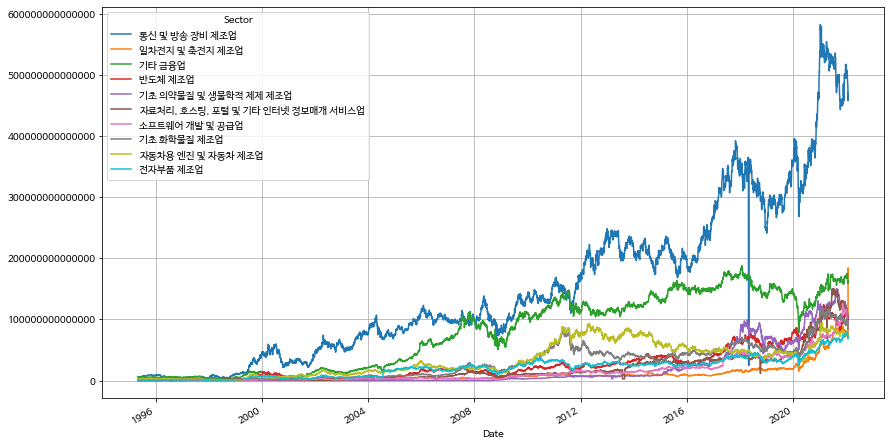

In [22]:
marcap_sector[cols].plot(figsize=(14,8))

펜데믹을 중심으로 2020년 이후 TOP10 섹터를 살펴봅니다.

<AxesSubplot:xlabel='Date'>

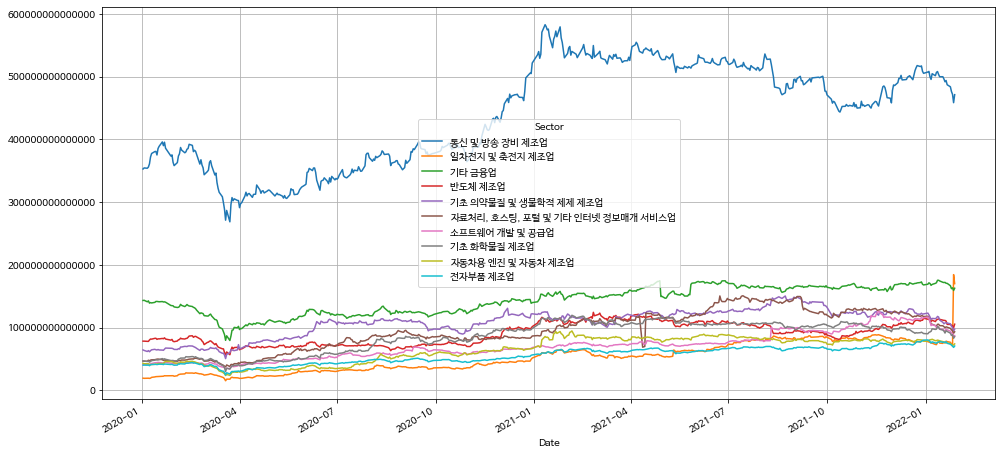

In [23]:
marcap_sector.loc['2020':, cols].plot(figsize=(16,8))

'통신 및 방송 장비 제조업' 섹터의 시가총액이 다른 섹터에 비해 압도적으로 크고 또 가파르게 성장하는 것을 확인할 수 있습니다.

## 섹터별 종목수 
TOP 10을 산출합니다.

In [24]:
marcap_sector_count = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='count')
marcap_sector_count[cols]

Sector,통신 및 방송 장비 제조업,일차전지 및 축전지 제조업,기타 금융업,반도체 제조업,기초 의약물질 및 생물학적 제제 제조업,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",소프트웨어 개발 및 공급업,기초 화학물질 제조업,자동차용 엔진 및 자동차 제조업,전자부품 제조업
Date,,,,,,,,,,
1995-05-02,4.0,3.0,31.0,1.0,1.0,NaN,NaN,14.0,3.0,10.0
1995-05-03,4.0,3.0,31.0,1.0,1.0,NaN,NaN,14.0,3.0,10.0
1995-05-04,4.0,3.0,32.0,1.0,1.0,NaN,NaN,14.0,3.0,10.0
1995-05-06,4.0,3.0,30.0,1.0,1.0,NaN,NaN,13.0,3.0,10.0
1995-05-08,4.0,3.0,30.0,1.0,1.0,NaN,NaN,14.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-24,68.0,12.0,93.0,54.0,38.0,19.0,145.0,42.0,4.0,121.0
2022-01-25,69.0,12.0,93.0,54.0,38.0,19.0,144.0,42.0,4.0,122.0
2022-01-26,69.0,12.0,93.0,54.0,38.0,19.0,146.0,42.0,4.0,121.0


<AxesSubplot:xlabel='Date'>

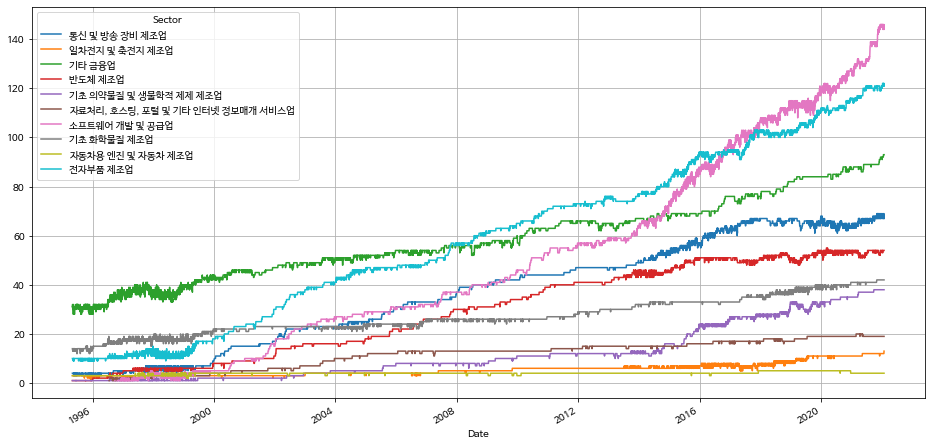

In [25]:
marcap_sector_count[cols].plot(figsize=(16,8))

In [26]:
marcap_sector_count.loc['2022-01-28']

Sector
1차 비철금속 제조업           18.0
1차 철강 제조업             56.0
가구 제조업                 8.0
가전제품 및 정보통신장비 소매업      2.0
가정용 기기 제조업             9.0
                      ... 
해상 운송업                 5.0
해체, 선별 및 원료 재생업        1.0
화학섬유 제조업               9.0
환경 정화 및 복원업            1.0
회사 본부 및 경영 컨설팅 서비스업   12.0
Name: 2022-01-28 00:00:00, Length: 161, dtype: float64

In [27]:
count_top10 = marcap_sector_count.loc['2022-01-28'].sort_values(ascending=False)[:10]
count_top10

Sector
소프트웨어 개발 및 공급업    145.0
특수 목적용 기계 제조업     139.0
전자부품 제조업          121.0
의약품 제조업            95.0
기타 금융업             93.0
자동차 신품 부품 제조업      92.0
기타 화학제품 제조업        84.0
금융 지원 서비스업         68.0
통신 및 방송 장비 제조업     67.0
자연과학 및 공학 연구개발업    57.0
Name: 2022-01-28 00:00:00, dtype: float64

특정 날짜(2021-01-15)기준으로 가장 많은 종목은 '특수 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '전자부품 제조업' 순이네요.

섹터별 종목수 TOP 10을 파이차트로 표현해 봅니다. 



<AxesSubplot:ylabel='2022-01-28 00:00:00'>

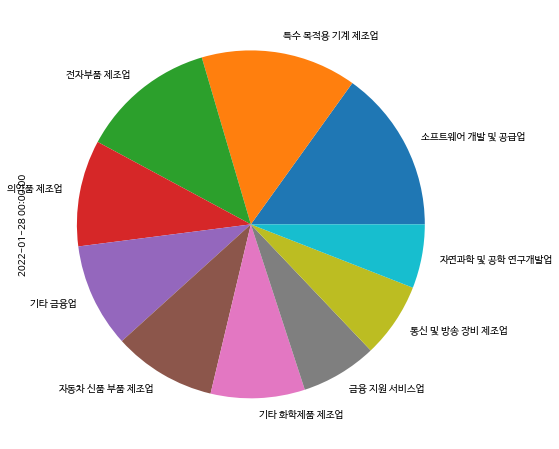

In [28]:
count_top10.plot.pie(figsize=(8, 8))

In [30]:
count_top10

Sector
소프트웨어 개발 및 공급업    145.0
특수 목적용 기계 제조업     139.0
전자부품 제조업          121.0
의약품 제조업            95.0
기타 금융업             93.0
자동차 신품 부품 제조업      92.0
기타 화학제품 제조업        84.0
금융 지원 서비스업         68.0
통신 및 방송 장비 제조업     67.0
자연과학 및 공학 연구개발업    57.0
Name: 2022-01-28 00:00:00, dtype: float64

## 결론
시가총액(marcap) 데이터셋은 26년간 개별 종목의 가격 등 다양한 데이터를 포함하고 있습니다. 

특정 분야의 종목의 시총을 일자별로 합산하면 특정 영역의 혹은 특정 산업의 트렌드를 분석하는데도 요긴하게 사용할 수 있으며, 산업의 규모나 트렌드 분석하는데도 사용할 수 있습니다.

#### 2018 - 2021 [FinanceData.KR]()